# Experiments with MNIST and mapper classsifier

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import mnist
from contextlib import contextmanager
from timeit import default_timer

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start

Using TensorFlow backend.


## Load MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Dense NN classifier

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3536 - accuracy: 0.9029 - val_loss: 0.1996 - val_accuracy: 0.9421
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1654 - accuracy: 0.9522 - val_loss: 0.1382 - val_accuracy: 0.9604
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9650 - val_loss: 0.1116 - val_accuracy: 0.9674
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9735 - val_loss: 0.0970 - val_accuracy: 0.9706
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9784 - val_loss: 0.0938 - val_accuracy: 0.9716
Epoch 6/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9822 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 7/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9851 - val_loss: 0.0772 - val_accuracy: 0.9765
Epoch 

## Mapper Classifier

In [4]:
import sys
sys.path.append('../')
from lib.mapper_class import *

In [5]:
mapper = MapperClassifier(n_batches=2, n_components=5, NRNN=3, n_intervals=10)

In [6]:
small_size = 1000
x_train_small = x_train[:small_size,::]
y_train_small = y_train[:small_size,::]

x_train_flat = np.reshape(x_train_small, (len(x_train_small),784))

with elapsed_timer() as elapsed:
    x_map = mapper.fit_transform(x_train_flat).astype('float32')
print(f"fit mapper to {small_size} data points in {elapsed()} seconds")

fit mapper to 1000 data points in 19.077298853 seconds


In [7]:
mapper_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

mapper_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

mapper_model.fit(x_map, y_train_small,
          batch_size=batch_size,
          epochs=100,
          verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2777 - accuracy: 0.2110
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 2.1685 - accuracy: 0.5160
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.0159 - accuracy: 0.6340
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.7969 - accuracy: 0.7210
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.5208 - accuracy: 0.7960
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2131 - accuracy: 0.8670
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9120 - accuracy: 0.9090
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.9420
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.9550
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.9630
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9960
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9960
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9960
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9970
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9950
Epoch 89/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.9960
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9960
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9960
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9970
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9970
Epoch 94/100
8/8 [===============

In [8]:
def mapper_predict(x_test):
    x_map_test = mapper.transform(np.reshape(x_test,(len(x_test),784)))
    return mapper_model.predict(x_map_test)

## Batching tests

In [9]:
times = []

for n_batches in range(1,6):
    mapper = MapperClassifier(n_batches=n_batches, n_components=5, NRNN=3, n_intervals=10)
    small_size = 1000
    x_train_small = x_train[:small_size,::]
    y_train_small = y_train[:small_size,::]

    x_train_flat = np.reshape(x_train_small, (len(x_train_small),784))

    with elapsed_timer() as elapsed:
        x_map = mapper.fit_transform(x_train_flat).astype('float32')
    print(f"fit mapper to {small_size} data points in {elapsed()} seconds")
    times.append((n_batches, elapsed()))

fit mapper to 1000 data points in 16.369392319000006 seconds
fit mapper to 1000 data points in 24.310132665999994 seconds
fit mapper to 1000 data points in 21.93935404300001 seconds
fit mapper to 1000 data points in 20.41908814899999 seconds
fit mapper to 1000 data points in 19.903066565000017 seconds


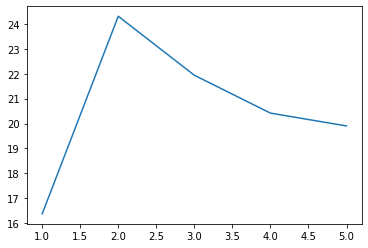

In [10]:
import matplotlib.pyplot as plt
plt.plot([n for (n,_) in times],[t for (_,t) in times])
plt.show()

## Tests

In [11]:
x_test_small = x_test[:100,::]
y_test_small = y_test[:100,::]

true = np.argmax(y_test_small,axis=1)
preds = np.argmax(model.predict(x_test_small),axis=1)

with elapsed_timer() as elapsed:
    preds_mapper = np.argmax(mapper_predict(x_test_small),axis=1)
print(elapsed())

# print(preds)
# print(preds_mapper)
# print(true)

print("accuracy: nnet: {}, mapper: {}".format(np.sum(preds==true)/len(true),np.sum(preds_mapper==true)/len(true)))

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 3688 but received input with shape [None, 5043]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

i=50
img=x_test[i]
pred_nn=np.argmax(model.predict(np.array([img])))
pred_map=np.argmax(mapper_predict(np.array([img])))
plt.imshow(np.squeeze(img), cmap = 'Greys')
plt.title("label={}, pred_nn={}, pred_map={}".format(np.argmax(y_test[i]),pred_nn,pred_map))
plt.show()

In [ ]:
from igraph import *
g=mapper.mappers[0].graphs[0]
layout = g.layout("rt_circular")
plot(g, layout = layout)